<a href="https://colab.research.google.com/github/joaogbsi/Desafio_5_DNC/blob/main/desafio5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-profiling==3.3.0

In [ ]:
#importações de bibliotecas
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


from pandas_profiling import ProfileReport
from sklearn.preprocessing import scale



/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


##Etapa 1

In [ ]:
#subir arquivo
upload = files.upload()

Saving data.csv to data.csv


In [ ]:
#carregando os arquivos

df = pd.read_csv("data.csv", encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Verificando as colunas tipos e quantidade de celulas com valor nulo

In [ ]:
#analisando tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376093 entries, 0 to 376092
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    376093 non-null  object 
 1   StockCode    376093 non-null  object 
 2   Description  374820 non-null  object 
 3   Quantity     376093 non-null  int64  
 4   InvoiceDate  376093 non-null  object 
 5   UnitPrice    376092 non-null  float64
 6   CustomerID   277315 non-null  float64
 7   Country      376092 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 23.0+ MB


Analise Estatisitca


In [ ]:
#analisando estatística de dados
df.describe()

,Quantity,UnitPrice,CustomerID
count,376093.000000,376092.000000,277315.000000
mean,9.800618,4.774822,15278.890933
std,180.268374,106.348714,1715.264076
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13881.000000
50%,3.000000,2.100000,15150.000000
75%,10.000000,4.130000,16782.000000
max,74215.000000,38970.000000,18287.000000


Atravez do describe é possivel identificar que existem valores negativos para quantidade e Preço unitário, que não pode ser aceito.

Tambem é possivel verificar que os valores maximos destas 2 colunas estão bem distante das médias e medianas

In [ ]:
#analise visual dos dados e algumas estatísticas
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Etapa 02
Verificando valores nulos

In [ ]:
#Contando dados nulos por colunas
df.isna().sum()

InvoiceNo          0
StockCode          0
Description     1273
Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     98778
Country            1
dtype: int64

In [ ]:
#removendo nulos
df_semNulos =df.dropna()
df_semNulos.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#Etapa 03
Valores menores que 0 na coluna preço e quantidade

In [ ]:
#verificando coluna UnitPrice, valores menores que 0
df_semNulos.query('UnitPrice<=0')
#Apangando valores menores que 0
df_clear = df_semNulos.query('UnitPrice>0')


In [ ]:
#verificando coluna Quantity, valores menores que 0
df_clear.query('Quantity <= 0')
#Apangando valores menores que 0
df_clear = df_clear.query('Quantity >0')

In [ ]:
#analise estatística dos dados
df_clear.describe()

,Quantity,UnitPrice,CustomerID
count,270901.000000,270901.000000,270901.000000
mean,13.541057,3.167519,15284.830289
std,149.473748,21.417470,1714.757541
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13890.000000
50%,6.000000,1.950000,15157.000000
75%,12.000000,3.750000,16791.000000
max,74215.000000,8142.750000,18287.000000


##Etapa 04
Valores Duplicados

In [ ]:
#exibir as colunas duplicadas
df_clear[df_clear.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
375705,569472,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,6,10/4/2011 12:38,1.25,14515.0,United Kingdom
375706,569472,22792,FLUTED ANTIQUE CANDLE HOLDER,12,10/4/2011 12:38,0.85,14515.0,United Kingdom
375708,569472,22792,FLUTED ANTIQUE CANDLE HOLDER,12,10/4/2011 12:38,0.85,14515.0,United Kingdom
376014,569491,23209,LUNCH BAG VINTAGE DOILY,1,10/4/2011 13:25,1.65,14056.0,United Kingdom


In [ ]:
#identificar os valores duplicados
(
    df_clear
    .groupby(df.columns.tolist(), dropna=False)
    .size()
    .to_frame('n_duplicates')
    .query('n_duplicates>1')
    .sort_values('n_duplicates', ascending=False)
    .head()
)

n_duplicates
InvoiceNo StockCode Description                     Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER  1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER 1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
538514    21756     BATH BUILDING BLOCK WORD        1        12/12/2010 14:27 5.95      15044.0    United Kingdom             6
540524    21756     BATH BUILDING BLOCK WORD        1        1/9/2011 12:53   5.95      16735.0    United Kingdom             6
541266    21755     LOVE BUILDING BLOCK WORD        1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6

In [ ]:
df_clear = df_clear.drop_duplicates()
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268051 entries, 0 to 376091
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    268051 non-null  object 
 1   StockCode    268051 non-null  object 
 2   Description  268051 non-null  object 
 3   Quantity     268051 non-null  int64  
 4   InvoiceDate  268051 non-null  object 
 5   UnitPrice    268051 non-null  float64
 6   CustomerID   268051 non-null  float64
 7   Country      268051 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 18.4+ MB


##Etapa 05
Tipos de dados

Alterando dados conforme a documentação do projeto

In [ ]:
df_clear['CustomerID'] = df_clear['CustomerID'].astype('int64')

In [ ]:
#converter objecto para datatima
df_clear['InvoiceDate'] = pd.to_datetime(df_clear['InvoiceDate'])
#aplicando a formatação, o campo volta a ser object. Usando o astype para forçar o datatime
df_clear['InvoiceDate'] = df_clear['InvoiceDate'].dt.strftime('%m/%d/%Y').astype('datetime64[ns]')

df_clear.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom


In [ ]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268051 entries, 0 to 376091
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    268051 non-null  object        
 1   StockCode    268051 non-null  object        
 2   Description  268051 non-null  object        
 3   Quantity     268051 non-null  int64         
 4   InvoiceDate  268051 non-null  datetime64[ns]
 5   UnitPrice    268051 non-null  float64       
 6   CustomerID   268051 non-null  int64         
 7   Country      268051 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 18.4+ MB


##Etapa 06
Tratando Outliers

<AxesSubplot:>

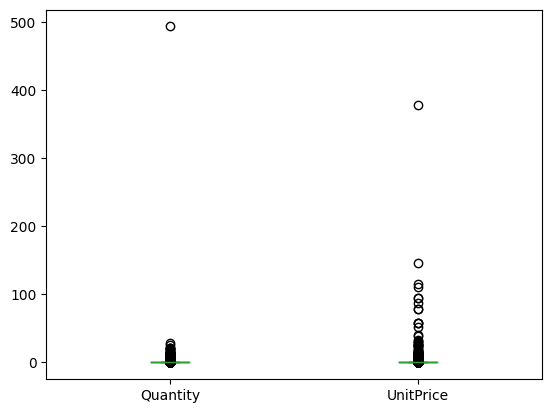

In [ ]:
#plotando dados para identificar valores fora do padrão
df_clear[['Quantity', 'UnitPrice']].apply(scale).plot.box()

Aplicar o cap

In [ ]:
df_clear.describe(percentiles=[.25,.50,.65,.75,.99])

,Quantity,UnitPrice,CustomerID,TotalCompra,mes
count,268049.000000,268049.000000,268049.000000,268049.000000,268049.000000
mean,13.371570,3.144350,15279.174125,23.113341,6.124097
std,45.052834,14.709168,1715.417672,106.729042,3.161932
min,1.000000,0.001000,12347.000000,0.001000,1.000000
25%,2.000000,1.250000,13881.000000,5.040000,3.000000
50%,6.000000,1.950000,15150.000000,12.750000,6.000000
65%,10.000000,2.950000,16115.000000,16.500000,8.000000
75%,12.000000,3.750000,16782.000000,19.800000,9.000000
99%,144.000000,14.950000,18221.000000,207.500000,12.000000
max,4300.000000,3155.950000,18287.000000,38970.000000,12.000000


De acordo com a documentação do projeto devera ser mantido apenas quantidade de vendas menores que 5000 e preço unitário menores que 10000
Na análise estatística gerado anteriormente, verificamos que até 99% dos dados o mair valor encontrado é 144 para Quantity e 14.95 para UnitePrice, ou seja estes valores outliers não compõe a maoiria dos dados.
Vou excluir eles da analise apenas com os filtros

In [ ]:
df_clear.query('Quantity>5000')

df_clear = df_clear.query('Quantity<10000')
df_clear = df_clear.query('UnitPrice<5000')
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268049 entries, 0 to 376091
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    268049 non-null  object        
 1   StockCode    268049 non-null  object        
 2   Description  268049 non-null  object        
 3   Quantity     268049 non-null  int64         
 4   InvoiceDate  268049 non-null  datetime64[ns]
 5   UnitPrice    268049 non-null  float64       
 6   CustomerID   268049 non-null  int64         
 7   Country      268049 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 18.4+ MB


In [ ]:
df_clear.describe()

,Quantity,UnitPrice,CustomerID
count,268049.000000,268049.000000,268049.000000
mean,13.371570,3.144350,15279.174125
std,45.052834,14.709168,1715.417672
min,1.000000,0.001000,12347.000000
25%,2.000000,1.250000,13881.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16782.000000
max,4300.000000,3155.950000,18287.000000


##Etapa 7
Coluna adicional

In [ ]:
df_clear['TotalCompra'] = df_clear['Quantity'] * df_clear['UnitPrice']

In [ ]:
df_clear.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCompra
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34


##Etapa 08
Última data


In [ ]:
dataMax = df_clear['InvoiceDate'].max()

dataMax

Timestamp('2011-10-04 00:00:00')

##Etapa 9

Plotando Graficos

In [ ]:

agg_top10Paises = df_clear.groupby(['Country'])['TotalCompra'].agg('sum').sort_values(ascending=False).head(10).reset_index()
agg_top10Paises

,Country,TotalCompra
0,United Kingdom,5033774.314
1,Netherlands,207135.660
2,EIRE,204532.210
3,Germany,161098.130
4,France,137449.790
5,Australia,114060.560
6,Spain,43936.350
7,Switzerland,40669.800
8,Sweden,29641.440
9,Belgium,27777.470


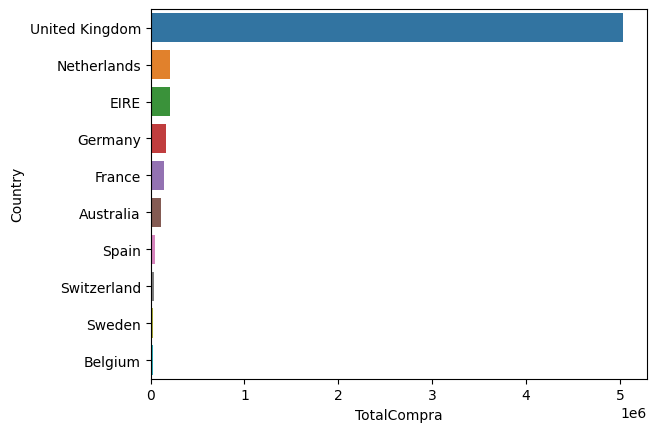

In [ ]:
ax = sns.barplot(data=agg_top10Paises, x='TotalCompra', y='Country')


In [ ]:
agg_top10Produtos = df_clear.groupby('Description')['Quantity'].agg('sum').sort_values(ascending=False).head(10).reset_index()
agg_top10Produtos

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,40731
1,JUMBO BAG RED RETROSPOT,34187
2,WHITE HANGING HEART T-LIGHT HOLDER,29513
3,PACK OF 72 RETROSPOT CAKE CASES,29159
4,ASSORTED COLOUR BIRD ORNAMENT,26327
5,PACK OF 60 PINK PAISLEY CAKE CASES,21240
6,ASSORTED COLOURS SILK FAN,20748
7,PACK OF 12 LONDON TISSUES,20696
8,MINI PAINT SET VINTAGE,20346
9,BROCADE RING PURSE,19244


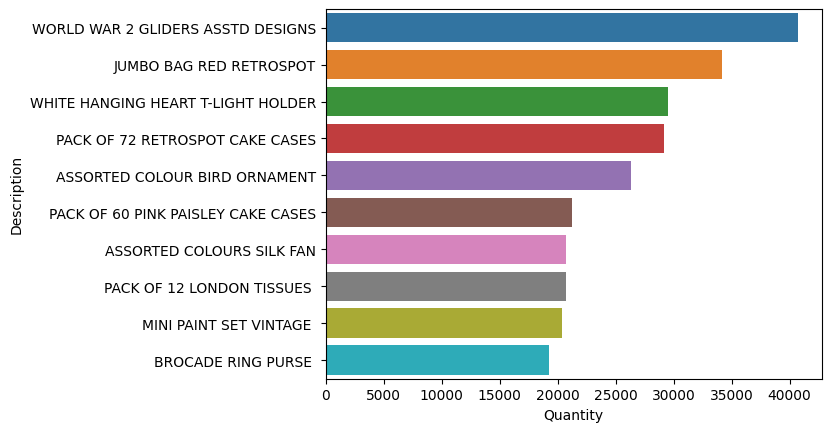

In [ ]:
plotProd = sns.barplot(data = agg_top10Produtos, x='Quantity', y='Description')


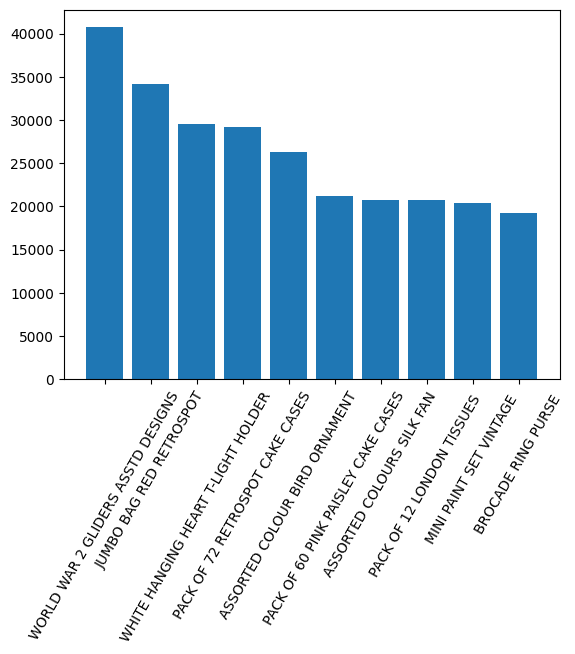

In [ ]:
plt.bar( agg_top10Produtos['Description'], agg_top10Produtos['Quantity'])
plt.xticks(rotation='60');

In [ ]:
df_clear['mes']=df_clear['InvoiceDate'].dt.month
agg_fatMes = df_clear.groupby('mes')['TotalCompra'].agg('sum').reset_index()

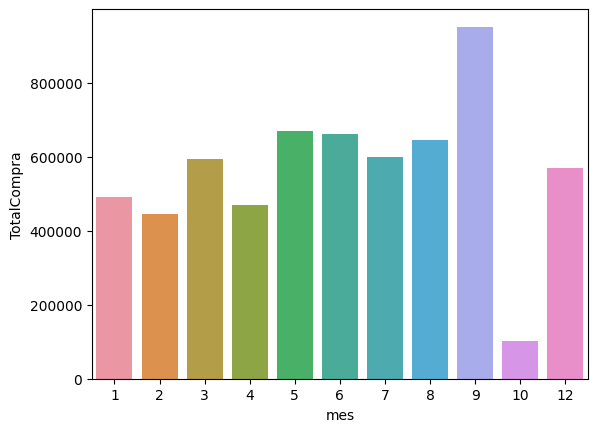

In [ ]:
plotFaturamentoMes = sns.barplot(data=agg_fatMes, x='mes', y='TotalCompra');

pais:  United Kingdom contador;  0
Australia
pais:  United Kingdom contador;  1
Belgium
pais:  United Kingdom contador;  2
Channel Islands
pais:  United Kingdom contador;  3
Cyprus
pais:  United Kingdom contador;  4
EIRE
pais:  United Kingdom contador;  5
Finland
pais:  United Kingdom contador;  6
France
pais:  United Kingdom contador;  7
Germany
pais:  United Kingdom contador;  8
Greece
pais:  United Kingdom contador;  9
Iceland
pais:  United Kingdom contador;  10
Italy
pais:  United Kingdom contador;  11
Lebanon
pais:  United Kingdom contador;  12
Netherlands
pais:  United Kingdom contador;  13
Poland
pais:  United Kingdom contador;  14
Portugal
pais:  United Kingdom contador;  15
Singapore
pais:  United Kingdom contador;  16
Spain
pais:  United Kingdom contador;  17
Sweden
pais:  United Kingdom contador;  18
Switzerland
pais:  United Kingdom contador;  19
United Kingdom
pais:  United Kingdom contador;  20
Australia
pais:  United Kingdom contador;  21
Austria
pais:  United Kingdom co

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (11,) and arg 1 with shape (10,).

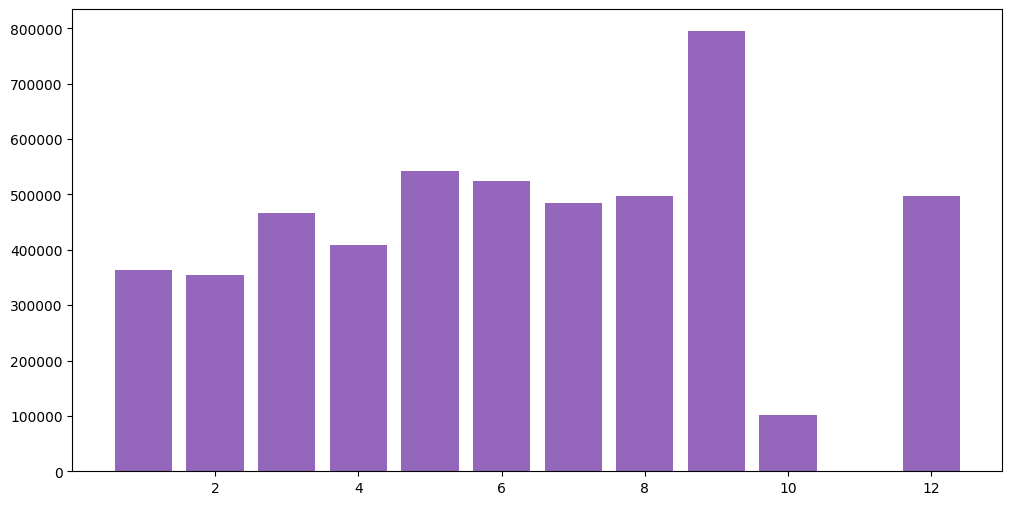

In [ ]:

# Definindo os dados
meses = agg_fatMes['mes']
paises = df_clear['Country']
total_compra_mes_pais = df_clear.groupby(['mes', 'Country'])['TotalCompra'].agg('sum').reset_index()

contador = 0
# Criando o gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
for pais in paises:
    print('pais: ',pais, 'contador; ', contador)
    print(total_compra_mes_pais['Country'][contador])
    compras_pais = total_compra_mes_pais[total_compra_mes_pais['Country'] == pais]['TotalCompra']
    contador +=1
    plt.bar(meses, compras_pais, label=pais)
# Personalizando o gráfico
plt.xlabel('Mês')
plt.ylabel('Total de Compras')
plt.title('Total de Compras por Mês e País')
plt.legend()

# Exibindo o gráfico
plt.show()

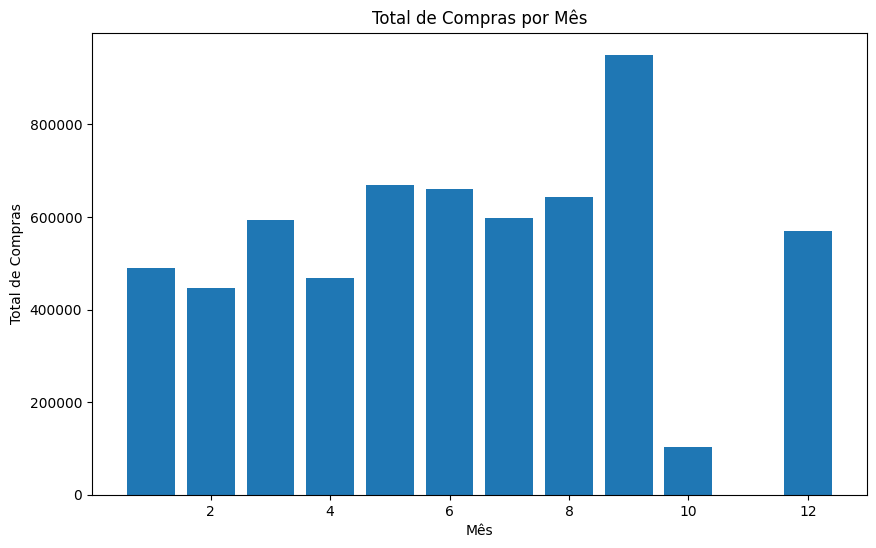

In [ ]:
# Definindo os dados
meses = agg_fatMes['mes']
total_compra_mes = agg_fatMes['TotalCompra']

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(meses, total_compra_mes)

# Personalizando o gráfico
plt.xlabel('Mês')
plt.ylabel('Total de Compras')
plt.title('Total de Compras por Mês')

# Exibindo o gráfico
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (11,) and arg 1 with shape (10,).

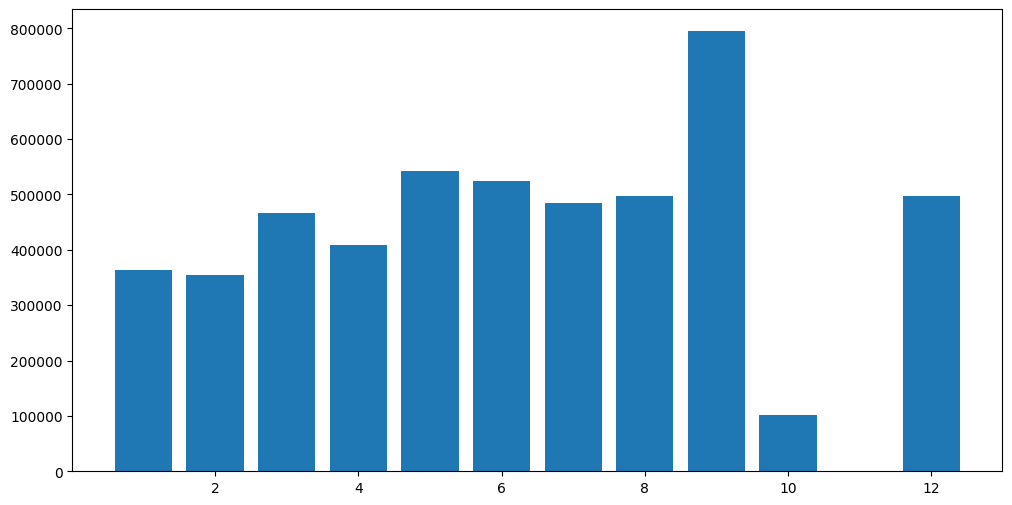

In [ ]:
meses = agg_fatMes['mes']
paises = agg_top10Paises['Country']
total_compra_mes_pais = df_clear.groupby(['mes', 'Country'])['TotalCompra'].agg('sum').reset_index()

# Criando o gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
for pais in paises:
    compras_pais = total_compra_mes_pais[total_compra_mes_pais['Country'] == pais]['TotalCompra']
    plt.bar(meses, compras_pais, label=pais)

# Personalizando o gráfico
plt.xlabel('Mês')
plt.ylabel('Total de Compras')
plt.title('Total de Compras por Mês e País')
plt.legend()

# Exibindo o gráfico
plt.show()

##Etapa 10
Calculo de RFM


In [ ]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268049 entries, 0 to 376091
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    268049 non-null  object        
 1   StockCode    268049 non-null  object        
 2   Description  268049 non-null  object        
 3   Quantity     268049 non-null  int64         
 4   InvoiceDate  268049 non-null  datetime64[ns]
 5   UnitPrice    268049 non-null  float64       
 6   CustomerID   268049 non-null  int64         
 7   Country      268049 non-null  object        
 8   TotalCompra  268049 non-null  float64       
 9   mes          268049 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 22.5+ MB


In [ ]:
df_clientePedido = df_clear.groupby(['CustomerID', 'InvoiceNo', 'InvoiceDate'])['TotalCompra'].agg('sum').reset_index()
df_clientePedido['Recence'] = dataMax - df_clientePedido['InvoiceDate']
df_clientePedido.head()

,CustomerID,InvoiceNo,InvoiceDate,TotalCompra,Recence
0,12347,537626,2010-12-07,711.79,301 days
1,12347,542237,2011-01-26,475.39,251 days
2,12347,549222,2011-04-07,636.25,180 days
3,12347,556201,2011-06-09,382.52,117 days
4,12347,562032,2011-08-02,584.91,63 days


In [ ]:
frequence = df_clientePedido.groupby('CustomerID')['InvoiceNo'].agg('count').reset_index()
recence = df_clientePedido.groupby('CustomerID')['Recence'].agg('max').reset_index()

In [ ]:
df_RFM = df_clientePedido.groupby('CustomerID')['TotalCompra'].agg('sum').reset_index()
df_RFM['Recence'] = recence['Recence']
df_RFM['Frequence'] = frequence['InvoiceNo']
df_RFM['TicketMedio'] = df_RFM['TotalCompra']/df_RFM['Frequence']

df_RFM

,CustomerID,TotalCompra,Recence,Frequence,TicketMedio
0,12347,2790.86,301 days,5,558.172000
1,12348,1797.24,292 days,4,449.310000
2,12350,334.40,244 days,1,334.400000
3,12352,2194.31,230 days,7,313.472857
4,12353,89.00,138 days,1,89.000000
...,...,...,...,...,...
3634,18280,180.60,211 days,1,180.600000
3635,18281,80.82,114 days,1,80.820000
3636,18282,100.21,60 days,1,100.210000
3637,18283,1086.83,271 days,10,108.683000


In [ ]:
df_RFM.to_csv('/output.csv', encoding='utf-8', index=False)